<a href="https://colab.research.google.com/github/mgb9/BDAO_2122/blob/main/Text%20Mining/TheSocialDilemma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()
# once you run this code, it will prompt you to select a file. You just need to "Choose a file" (any file you want to do sentiment analysis) from your laptop. 

Saving justdoit_tweets.csv to justdoit_tweets.csv


In [ ]:
# once you upload the data to the cloud, you can read the data into dataframe. 
# Remember, if you close the notebook or disconnect, you need to upload the file (run the code above) again before you read data.

import io
import pandas as pd
df = pd.read_csv('TheSocialDilemma.csv') # change the csv file name to your file name that you uploaded
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,Sentiment
0,Mari Smith,"San Diego, California",Premier Facebook Marketing Expert | Social Med...,2007-09-11 22:22:51,579942,288625,11610,False,2020-09-16 20:55:33,@musicmadmarc @SocialDilemma_ @netflix @Facebo...,NaN,Twitter Web App,False,Neutral
1,Mari Smith,"San Diego, California",Premier Facebook Marketing Expert | Social Med...,2007-09-11 22:22:51,579942,288625,11610,False,2020-09-16 20:53:17,@musicmadmarc @SocialDilemma_ @netflix @Facebo...,NaN,Twitter Web App,False,Neutral
2,Varun Tyagi,"Goa, India",Indian | Tech Solution Artist & Hospitality Ex...,2009-09-06 10:36:01,257,204,475,False,2020-09-16 20:51:57,Go watch “The Social Dilemma” on Netflix!\n\nI...,NaN,Twitter for iPhone,False,Positive
3,Casey Conway,"Sydney, New South Wales",Head of Diversity & Inclusion @RugbyAU | It's ...,2012-12-28 21:45:06,11782,1033,12219,True,2020-09-16 20:51:46,I watched #TheSocialDilemma last night. I’m sc...,['TheSocialDilemma'],Twitter for iPhone,False,Negative
4,Charlotte Paul,Darlington,Instagram Charlottejyates,2012-05-28 20:43:08,278,387,5850,False,2020-09-16 20:51:11,The problem of me being on my phone most the t...,['TheSocialDilemma'],Twitter for iPhone,False,Positive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20068 entries, 0 to 20067
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         20067 non-null  object
 1   user_location     15860 non-null  object
 2   user_description  18685 non-null  object
 3   user_created      20068 non-null  object
 4   user_followers    20068 non-null  int64 
 5   user_friends      20068 non-null  int64 
 6   user_favourites   20068 non-null  int64 
 7   user_verified     20068 non-null  bool  
 8   date              20068 non-null  object
 9   text              20068 non-null  object
 10  hashtags          15771 non-null  object
 11  source            20068 non-null  object
 12  is_retweet        20068 non-null  bool  
 13  Sentiment         20068 non-null  object
dtypes: bool(2), int64(3), object(9)
memory usage: 1.9+ MB


## **Understand who are posting the tweets about the film**

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127482 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127474 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129318 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127996 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2384 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3944 missing from current font.
  font.se

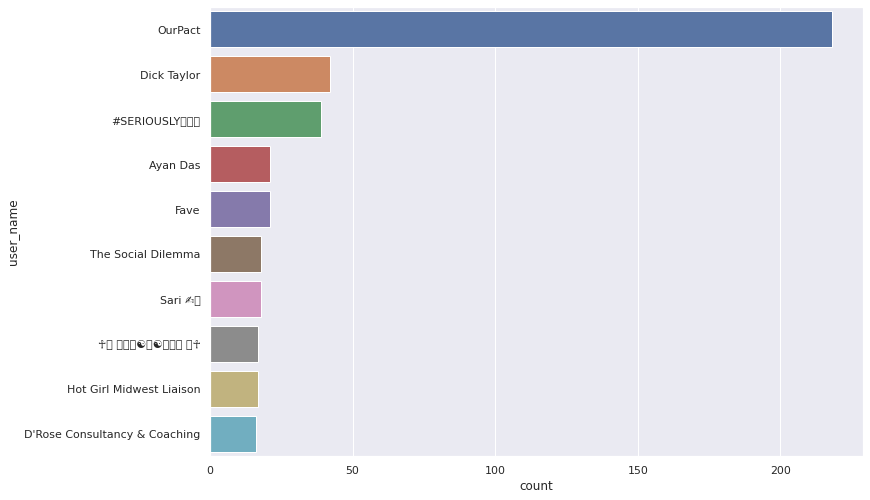

In [ ]:
sns.countplot(y="user_name", data=df, order = df['user_name'].value_counts().index[0:10])

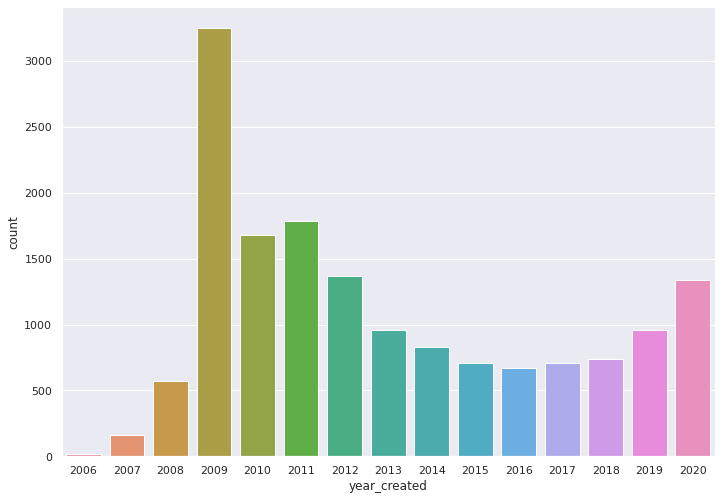

In [ ]:
# Plot the created_date of users who post tweets about social dilemma
df['user_created'] = pd.to_datetime(df['user_created'])
df['year_created'] = df['user_created'].dt.year
data = df.drop_duplicates(subset='user_name', keep="first")
sns.countplot(x="year_created", data=data)

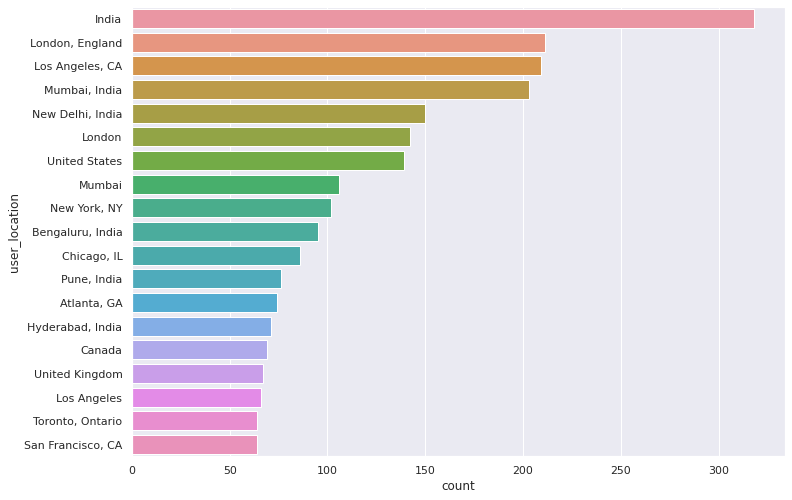

In [ ]:
# Plot the location of users who post tweets about social dilemma

data = data[data['user_location']!='NaN']
sns.countplot(y="user_location", data=data, order = data['user_location'].value_counts().index[0:19])

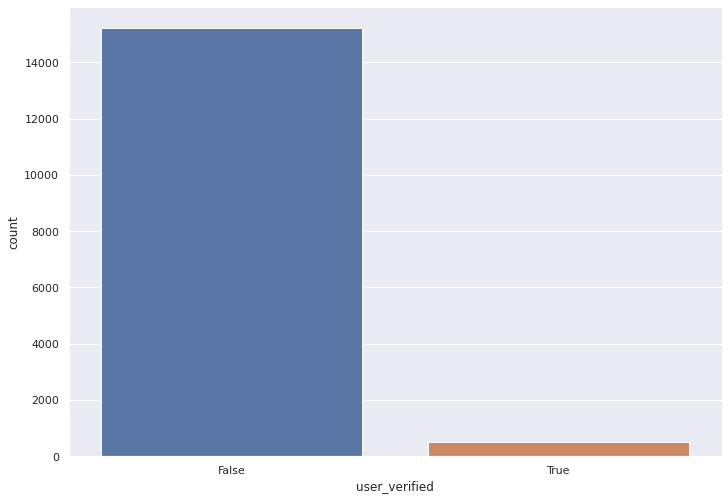

In [ ]:
# Plot the verfication_status of users who post tweets about social dilemma
sns.countplot(x="user_verified", data=data)

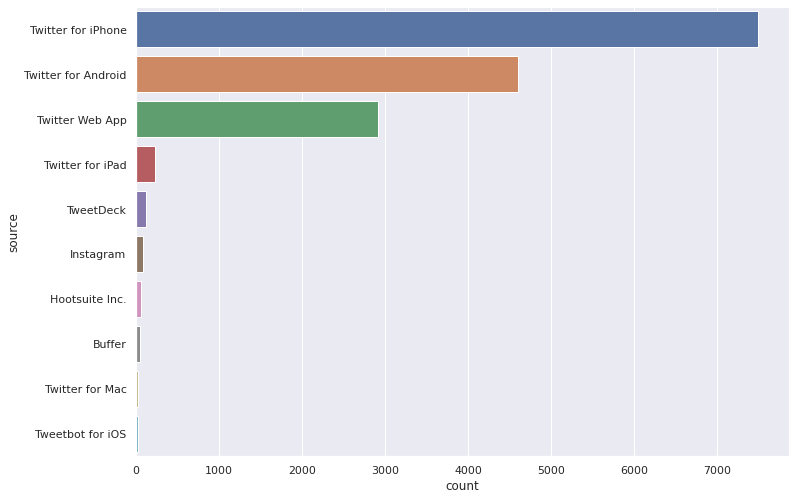

In [ ]:
# Plot the sources used by the users who post tweets about social dilemma
sns.countplot(y="source", data=data, order = data['source'].value_counts().index[0:10])

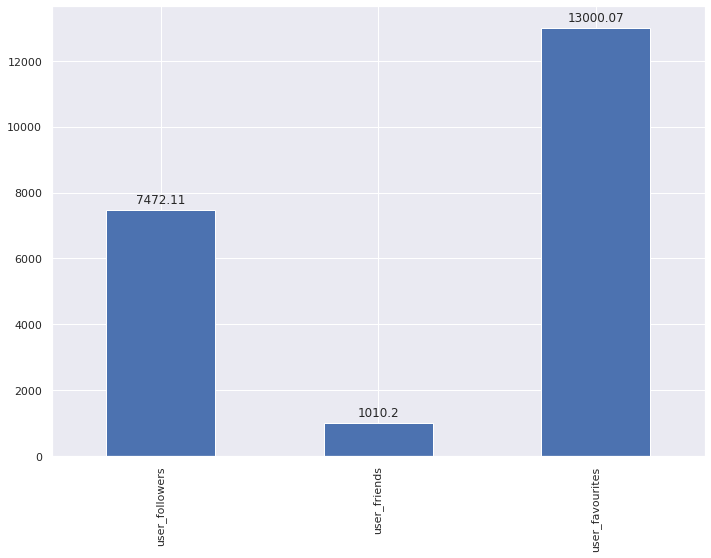

In [ ]:
# Plot the number of follower, friends,favourites of users who post tweets about social dilemma
columns = ['user_followers','user_friends','user_favourites']
ax = data[columns].mean().plot.bar()
for p in ax.patches:
  ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()),ha='center',va='center',xytext=(0, 10),textcoords='offset points')

## **Understand the general info of the tweets about the film**

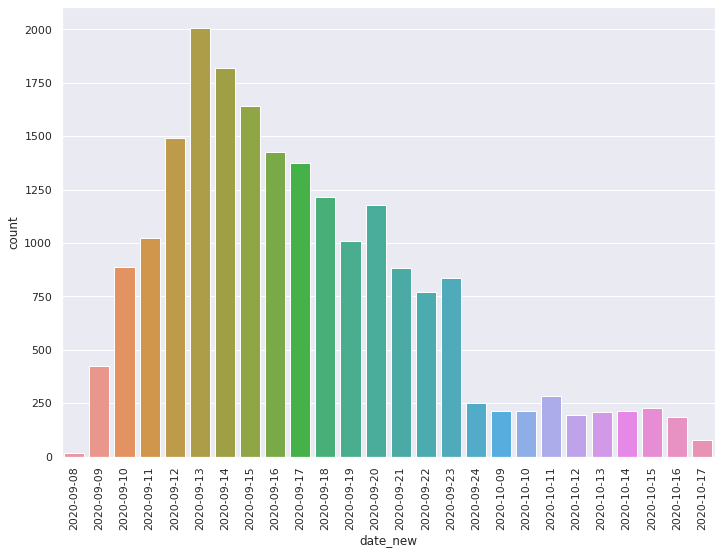

In [ ]:
# plot the distribution of tweets by date
df['date_new'] = pd.to_datetime(df['date']).dt.date
chart = sns.countplot(x="date_new", data=df.sort_values(by=['date']))
chart.tick_params(axis='x', rotation=90)

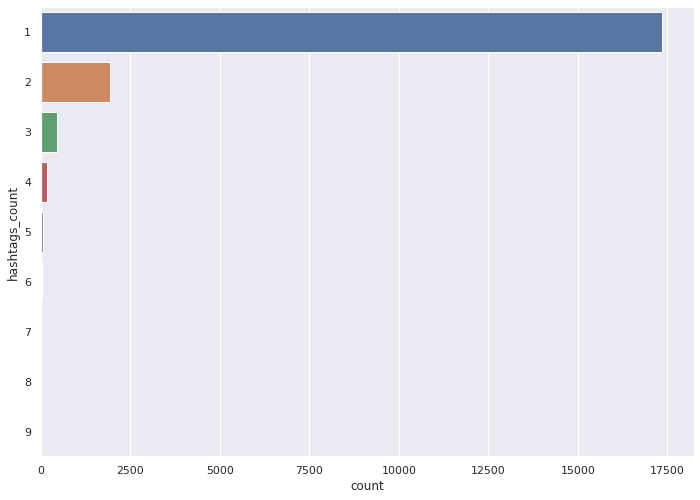

In [ ]:
# plot the number of tweets by the number of hashtags in the tweets
df['hashtags'] = df['hashtags'].fillna('[]')
df['hashtags_count'] = df['hashtags'].apply(lambda x: len(x.split(',')))
sns.countplot(y="hashtags_count", data=df.sort_values(by=['date']))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


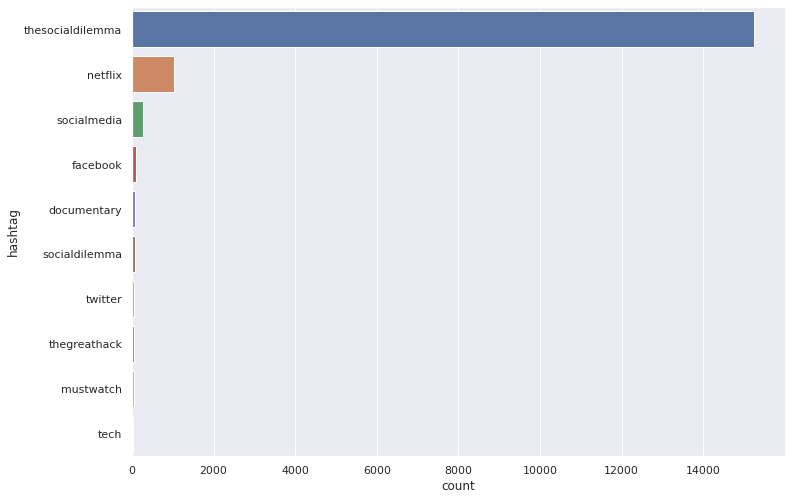

In [ ]:
# plot the top 10 hashtags in the tweets

def split_hashtags(x): 
    return str(x).replace('[', '').replace(']', '').split(',')

tweets_df = df[df['hashtags']!='[]']
tweets_df['hashtag'] = tweets_df['hashtags'].apply(lambda row : split_hashtags(row))
tweets_df = tweets_df.explode('hashtag')
tweets_df['hashtag'] = tweets_df['hashtag'].astype(str).str.lower().str.replace("'", '').str.replace(" ", '')

sns.countplot(y="hashtag", data=tweets_df, order = tweets_df['hashtag'].value_counts().index[0:10])

## **Understand the sentiment of the tweets about the film**

In [ ]:
import re
 
df['text'] = df['text'].map(lambda x: re.sub("@[A-Za-z0-9_]+","", x)) #remove mentions
df['text'] = df['text'].map(lambda x: re.sub("#[A-Za-z0-9_]+","", x)) #remove hashtags
df['text'] = df['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0]) #remove links

df['text'] = df['text'].map(lambda x: re.sub('\s+', ' ', x)) #remove /n
df['text'] = df['text'].map(lambda x: re.sub('\s{2,}', " ", x)) #remove overspace

In [ ]:
# first, import the package (suppose we haven't imported it yet) run the analyzer (SentimentIntensityAnalyzer())
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Then create new columns for your dataframe (compound, pos, neu, neg) with empty dictionary
# With for loop, we get the scores for each review and append the scores to the dictionary

Result = { 'compound':[], 'pos':[] , 'neu':[], 'neg':[] }

for tweet in df['text']:
    score = sid.polarity_scores(tweet)
    Result['pos'].append(score['pos'])
    Result['neu'].append(score['neu'])
    Result['neg'].append(score['neg'])
    Result['compound'].append(score['compound'])

# Once this is done, new columns are created and dictionary is transformed to the dataframe

df['compound'] = pd.DataFrame(Result)['compound']
df['pos'] = pd.DataFrame(Result)['pos']
df['neu'] = pd.DataFrame(Result)['neu']
df['neg'] = pd.DataFrame(Result)['neg']

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
import numpy as np
df['sentiment_vader']=np.where(df['compound']>=0.05, 'Positive',np.where(df['compound']<=-0.05,'Negative', 'Neutral'))

In [ ]:
df['sentiment_vader'].value_counts()

Neutral     7441
Positive    7420
Negative    5207
Name: sentiment_vader, dtype: int64

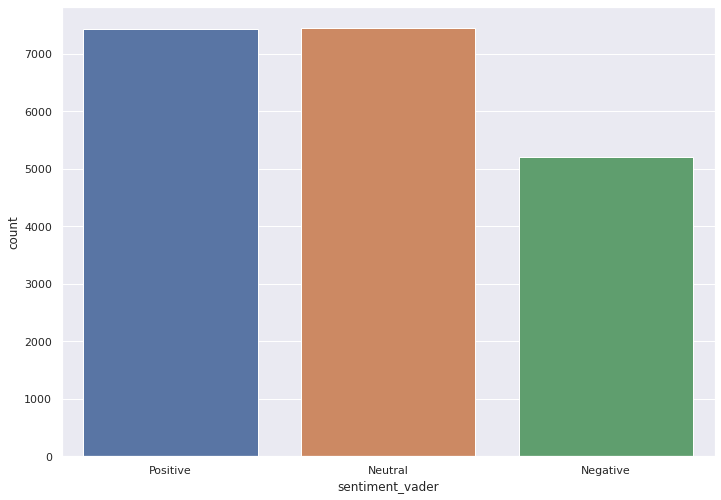

In [ ]:
sns.countplot(x='sentiment_vader',data = df,order=['Positive','Neutral','Negative'])

## **Understand what they are talking about the film**

In [ ]:
df['text_filtered'] = df['text'].str.lower()
# Remove emoji
# First, build a list of commonly used emojis
emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)

# Then remove the emoji
df['text_filtered'] = df['text_filtered'].map(lambda x: re.sub(emoj, ' ', x))

# Remove punctuation
import string
df['text_filtered'] = df['text_filtered'].map(lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x))


In [ ]:
# do tokenisation,lemmatisation and stopwords removal

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


# create a list of the reviews from the 'Reviews' column
words = df['text_filtered'].tolist()

# tokenise the words
from nltk.tokenize import word_tokenize

# create an empty list to put the tokenised words
word_tokens = [] 
for review in words:
    word_tokens.append(word_tokenize(review))


# remove stopwords
from nltk.corpus import stopwords
# use English stopwords
stopwords = stopwords.words("english")
# you can also extend the stopwords list with more words that you want to remove
stopwords.extend(['re'])

# create a new list with stop words removed
tokens_without_stopwords = []
for review in word_tokens:
    tokens_without_stopwords.append([w for w in review if not w in stopwords])


# lemmatise the words
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# The lemmatizer requires the correct POS tag to be accurate, if you use the default settings of the WordNetLemmatizer.lemmatize(), the default tag is noun.
# Which means the words other than noun would not be lemmatised, and this is not what we expect.
# Therefore we need to define the POS tags ('n' for nouns(default), 'a' for adj, 'v' for verb, 'r' for adverb) which are allowed to be lemmatised.

lemmatised = []
for review in tokens_without_stopwords: 
  n_lemmatised = [lemmatizer.lemmatize(w) for w in review]
  v_lemmatised = [lemmatizer.lemmatize(w,'v') for w in n_lemmatised]
  r_lemmatised = [lemmatizer.lemmatize(w,'r') for w in v_lemmatised]
  a_lemmatised = [lemmatizer.lemmatize(w,'a') for w in r_lemmatised]
  lemmatised.append(a_lemmatised) 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# put the tokens back together as text to have our filtered reviews
rejoin = []
for review in lemmatised: # Here we choose to use stemming instead of lemmatisation
    x = " ".join(review) # join the text back together 
    # remove punctuation from the reviews using the string package
    rejoin.append(x)

# add the reformed text to the data frame    
df['text_filtered'] = rejoin

In [ ]:
# vectorise the data into word counts

from sklearn.feature_extraction.text import CountVectorizer

max_words = 1000 #how many words taking account for topic modeling 
vectorizer = CountVectorizer(max_features=max_words)
vec = vectorizer.fit_transform(df['text_filtered'])

In [ ]:
# fit LDA

from sklearn.decomposition import LatentDirichletAllocation as LDA

k = 5 #this is the number of the topic. you can decide the number
lda = LDA(n_components=k, max_iter=5, learning_method='online')
lda.fit(vec)

LatentDirichletAllocation(learning_method='online', max_iter=5, n_components=5)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


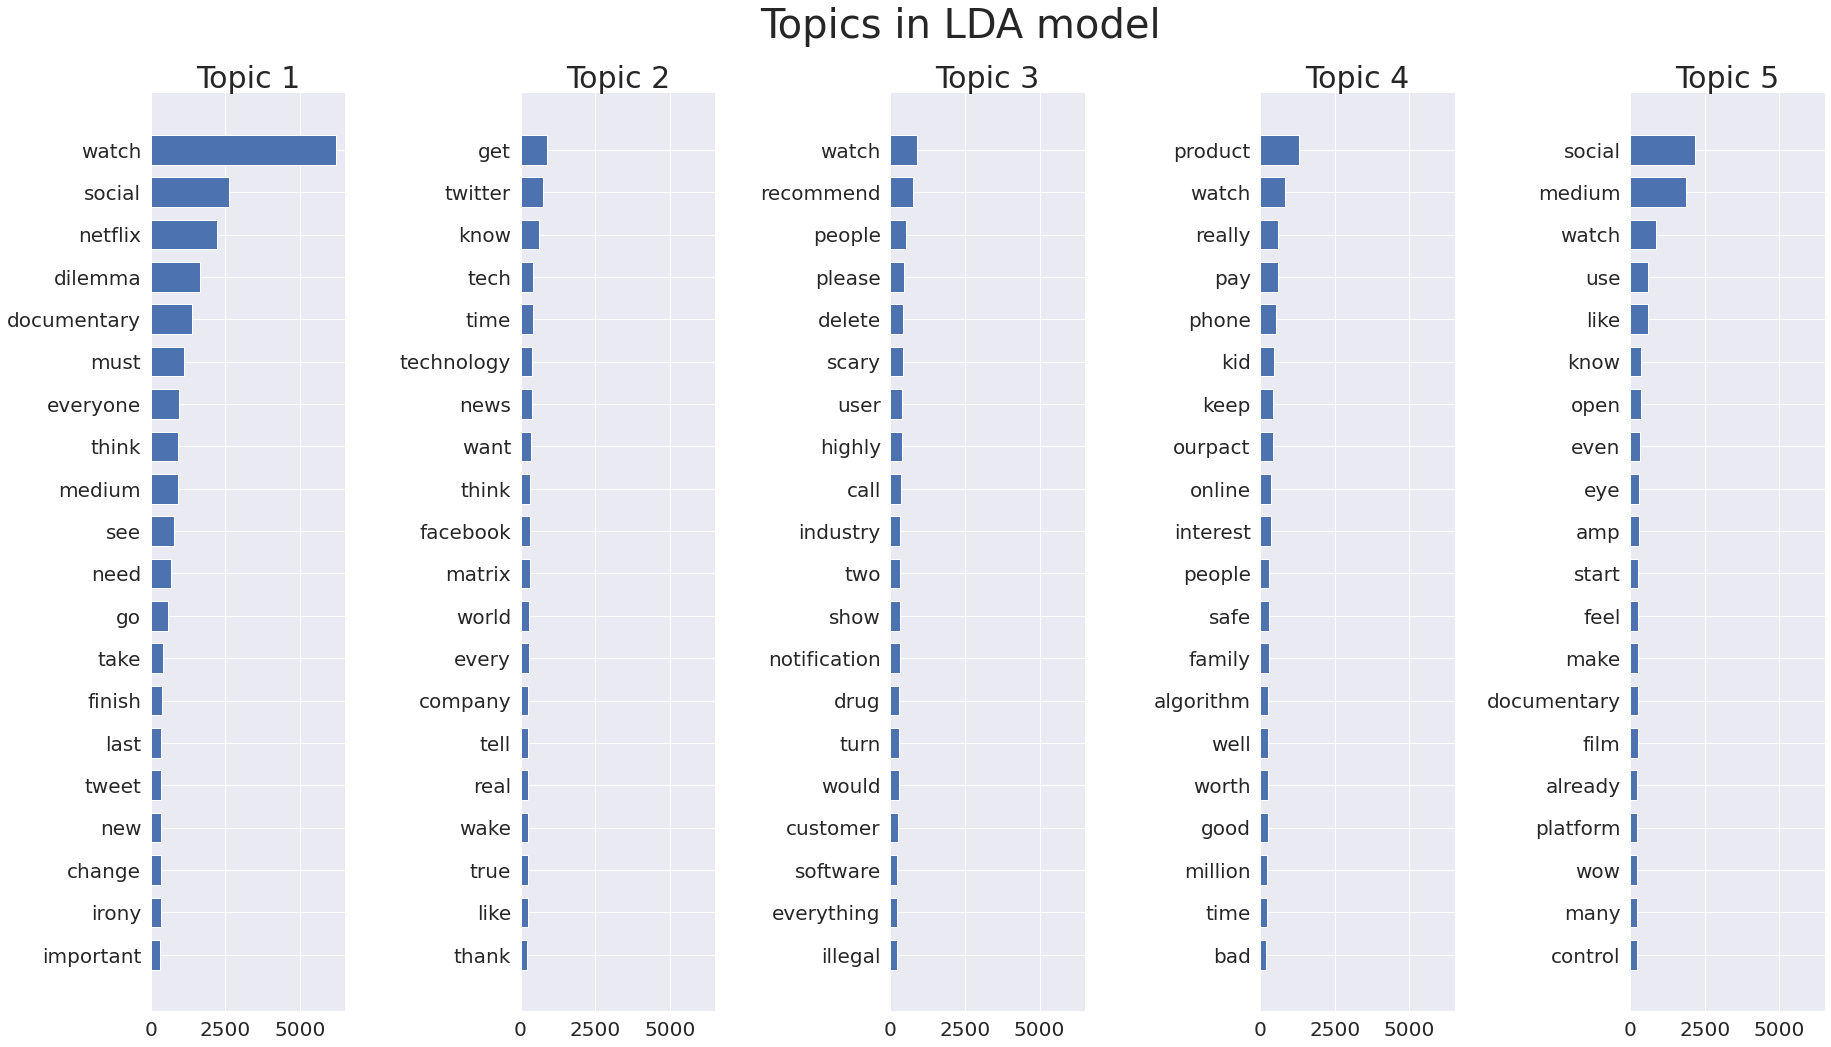

In [ ]:
# Visualise the result into topic clouds

%matplotlib inline
import matplotlib.pyplot as plt

# helper function to plot topics
# see Grisel et al. 
# https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

n_top_words = 20  #how many words to be visualised in each topic

# get the list of words (feature names)
vec_feature_names = vectorizer.get_feature_names()

# print the top words per topic
plot_top_words(lda, vec_feature_names, n_top_words, 'Topics in LDA model')